# Lab 4 Exercises Solution

Now that you've seen how linear regression was applied in the main lab, you are asked to implement it yourself with slightly different steps, to see how it will impact the results.

## Step 1 - Import Libraries

Since we'll be using these libraries frequently, let's load them as the first step.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Step 2 - Load the Dataset

In [2]:
try:
    df = pd.read_csv('../data/insurance.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/Summer2025/refs/heads/main/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 3 - Data Understanding

Call `.describe()` for summary statistics and `.describe(include='object')` for a summary of the non-numerical attributes.

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


How many smokers and non-smokers are there in the dataset?

Hint: `value_counts()`

In [5]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [6]:
# Alternatively, as a percentage
df['smoker'].value_counts() / df['smoker'].count() * 100

,count
smoker,
no,79.521674
yes,20.478326


## Step 4 - Exploratory Data Analysis

Try calling seaborn's `pairplot` function on the data ([documentation page](https://seaborn.pydata.org/generated/seaborn.pairplot.html)). How is this function useful?

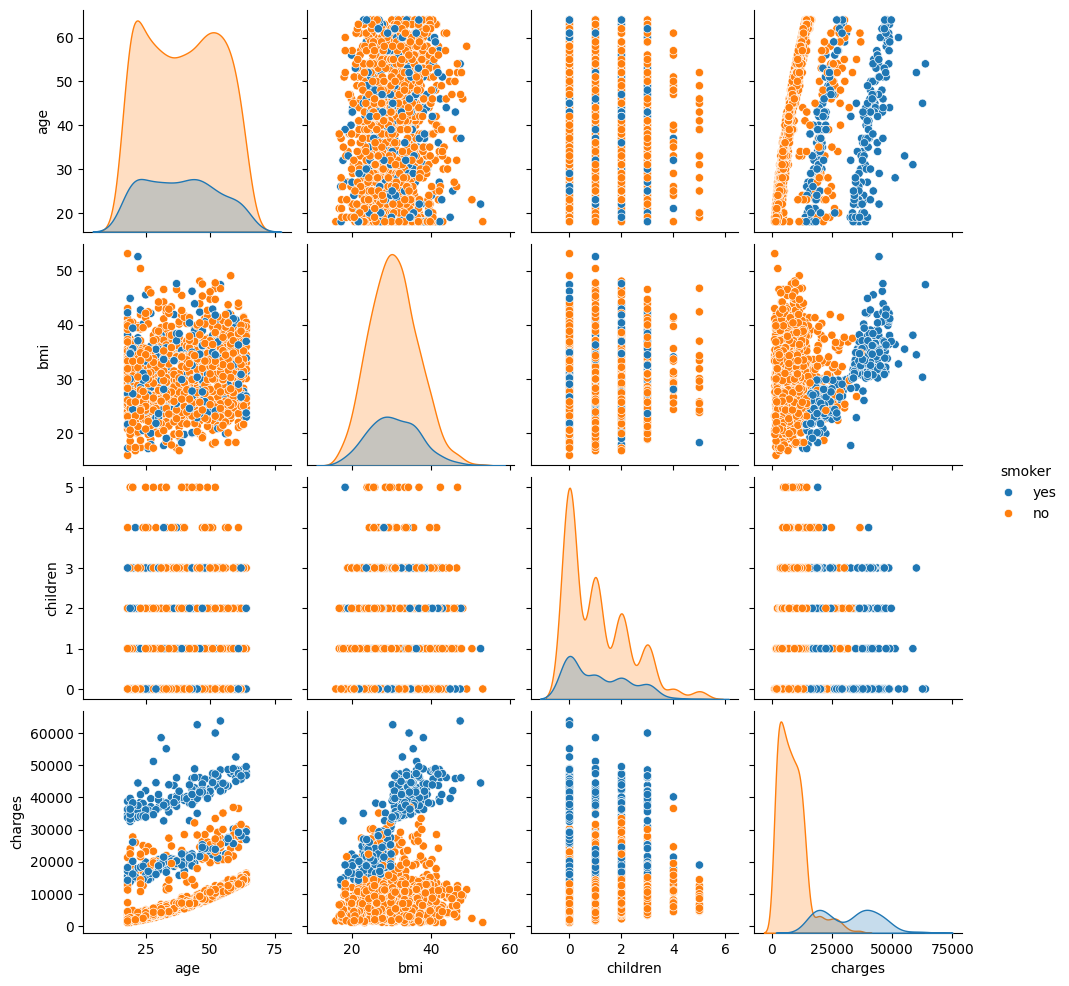

In [7]:
# we'll also distinguish between smokers and non-smokers with hue
# pairplot is good for detecting interesting patterns in the data to investigate further
sns.pairplot(df, hue='smoker');

Plot the data's correlation matrix as a heatmap using seaborn

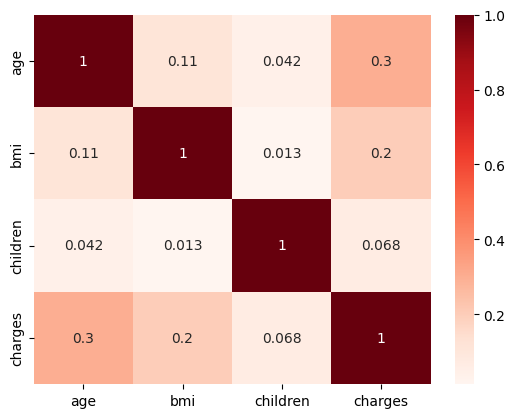

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Reds');

Calculate the mean and standard deviation of insurance charges for smokers and non-smokers

Hint: `groupby`

In [9]:
df[['smoker', 'charges']].groupby('smoker').agg(['mean', 'std'])

charges              
                mean           std
smoker                            
no       8434.268298   5993.781819
yes     32050.231832  11541.547176

Create a [box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and a [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) of insurance charges against the number of children a person has

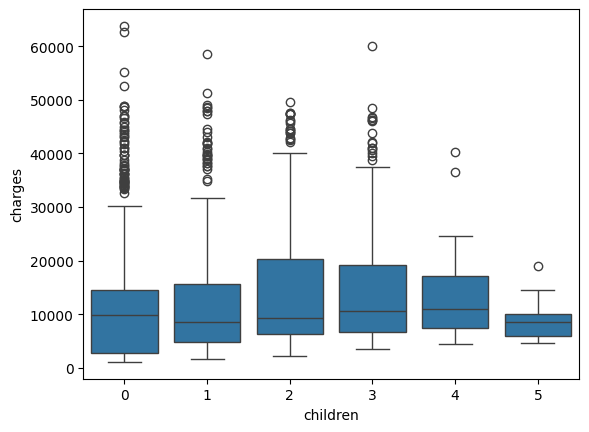

In [10]:
sns.boxplot(x='children', y='charges', data=df);

**Interpretation:**

Boxplots can be used to demonstrate the <b> distribution </b> of quantitative data to compare multiple variables with each other or compare different levels of a categorical variable. Boxplots specifically show the <b>minimum</b>, <b>first quartile (Q1)</b>, <b>median (Q2)</b>, <b>third quartile (Q3)</b>, and <b>maximum</b> values, respectively for a set of data. Thus, it provides a <b>five-number</b> summary for data.

Reflecting on the above example, we can interpret the boxplot as follows: based on the <b>median (Q2)</b> of values, the amount of insurance charges paid by a person having 0 children is more than that having 1 child. Also, based on the <b>median (Q2)</b> of values, a person having 4 children pays the greatest amount of insurance charges.

Alternatively, the interpretation can consider the <b>maximum value</b>, instead of the <b>median (Q2)</b>, to compare the levels of the variable to each other. In this case, we can say that based on the <b>maximum value</b>, a person having 2 children is the one who pays the largest amount of insurance charges.

Furthermore, based on the <b>minimum</b> and <b>maximum</b> values, data for a person having 2 children has the widest distrubtion.

<br>

*Extra Links:*

- [seaborn.boxplot — seaborn 0.13.0 documentation (pydata.org)](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

- [Box plot review (article) | Khan Academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review)


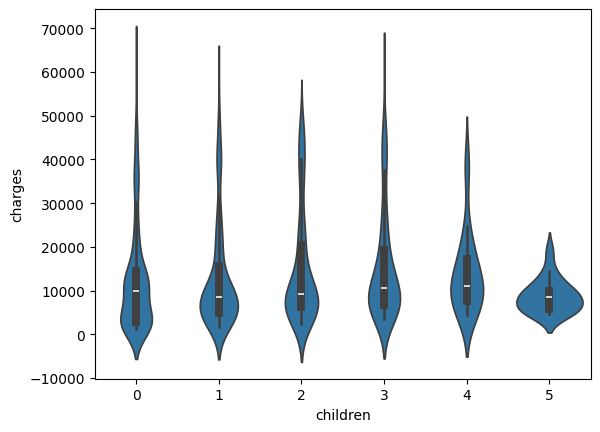

In [11]:
sns.violinplot(x='children', y='charges', data=df);

## Step 5 - Data Transformation / Pre-Processing

Given that linear regression only accepts numerical attributes, we need to transform our categorical values to numerical ones. Instead of on-hot encoding as per the main lab, apply label encoding.

The label encoder is implemented for 'sex' and 'region' as an example. Label encode the 'smoker' column in the dataframe.

**Solution note**: See *[label encoding across multiple columns in scikit-learn](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)* on StackOverflow for more on the topic as well as better alternative solutions to handle many columns at a time.

In [12]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# label encode 'sex' feature
sex_le = LabelEncoder()
df_encoded['sex'] = sex_le.fit_transform(df['sex'])

# label encode 'region' feature
region_le = LabelEncoder()
df_encoded['region'] = region_le.fit_transform(df['region'])

# label encode 'smoker' feature
smoker_le = LabelEncoder()
df_encoded['smoker'] = smoker_le.fit_transform(df['smoker'])

# alternatively, if inverse transform is not needed:
# cols = ['sex', 'region', 'smoker']
# df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [13]:
# inverse transform example
smoker_le.inverse_transform(df_encoded['smoker'])

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

Now that some other features have been converted to a numerical type, plot the correlation matrix again. What deductions can you now make?

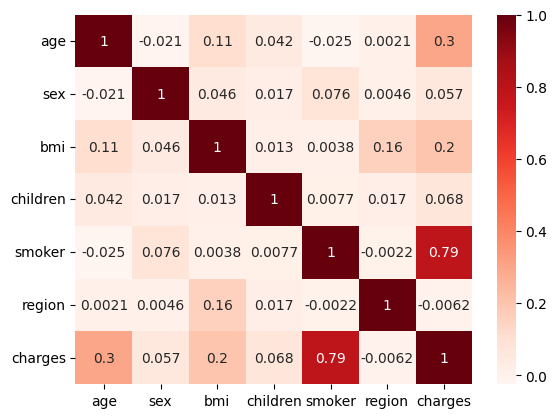

In [14]:
sns.heatmap(df_encoded.corr(), annot=True, cmap='Reds');
# new conclusion: smoking is highly correlated with insurance charges

Since there are large differences in magnitude in the insurance charges column, log scaling the values (a non-linear transformation) could be a potential improvement since it essentially compresses wide range of values to a narrow range, improving linear model performance. Apply log scaling to the insurance charges column of `df_encoded`.

Hint: consider using numpy's log10 function

In [15]:
df_encoded['charges'] = np.log10(df_encoded['charges'])
df_encoded['charges']

,charges
0,4.227499
1,3.236928
2,3.648308
3,4.342116
4,3.587358
...,...
1333,4.025328
1334,3.343602
1335,3.212143
1336,3.302752


Plot a [histogram plot](https://seaborn.pydata.org/generated/seaborn.histplot.html) of the original insurance charges data with the `kde` parameter set to `True`.

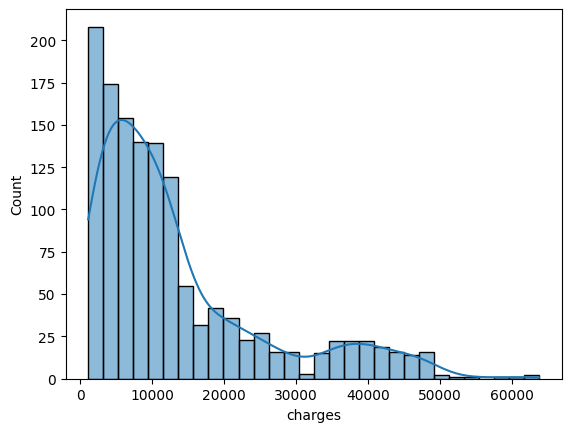

In [16]:
sns.histplot(df['charges'], kde=True);

Plot a [histogram plot](https://seaborn.pydata.org/generated/seaborn.histplot.html) of the log-scaled charges data with the `kde` parameter set to `True`. How does it compare to the distribution before log-scaling?

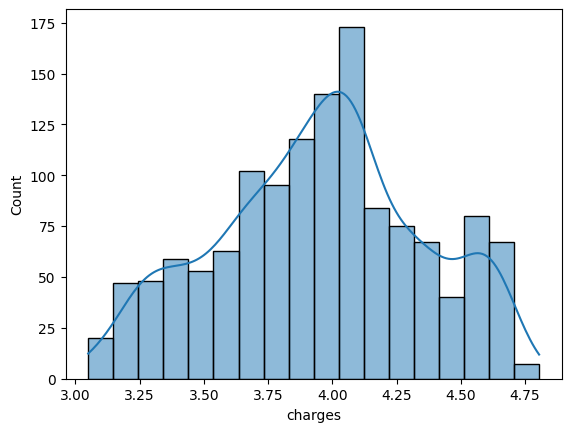

In [17]:
sns.histplot(df_encoded['charges'], kde=True);
# Log scaling has resulted in a less skewed distribution

## Step 6 - Modelling

Split your data into training and testing data and apply the linear regression model from the sklearn library

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_encoded.drop('charges',axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

## Step 7 - Model Evaluation

Evaluate your model using the model's `.score` function. How did your solution with label encoding and log scaling fare compared to the lab's one-hot encoding approach?

Note: if you used log-scaling, you'll need to apply the antilog (i.e. reverse of the logarithm) to the predictions to get their actual value in USD.

In [19]:
lin_reg.score(X_test, y_test)
# The model's r^2 score increased by almost 0.05 just by applying log-scaling on charges
# Baseline: 0.753; Current: 0.798

0.797671813475768

## Step 8 - Model Validation (Optional)

Repeat the model validation routine for linear regression as done in the main lab notebook. How does your model fare compared to the lab's baseline model?

In [20]:
y_pred = lin_reg.predict(X_test)

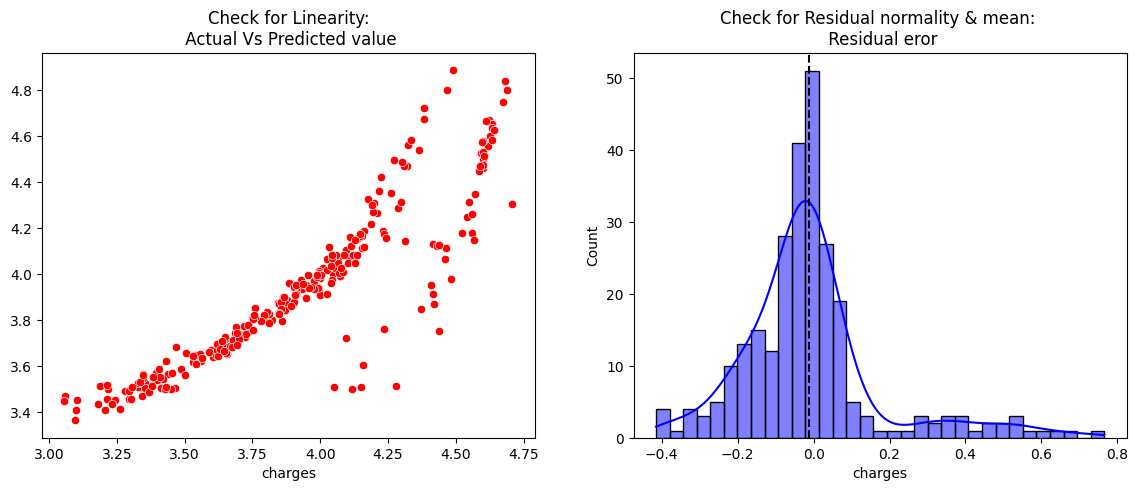

In [21]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

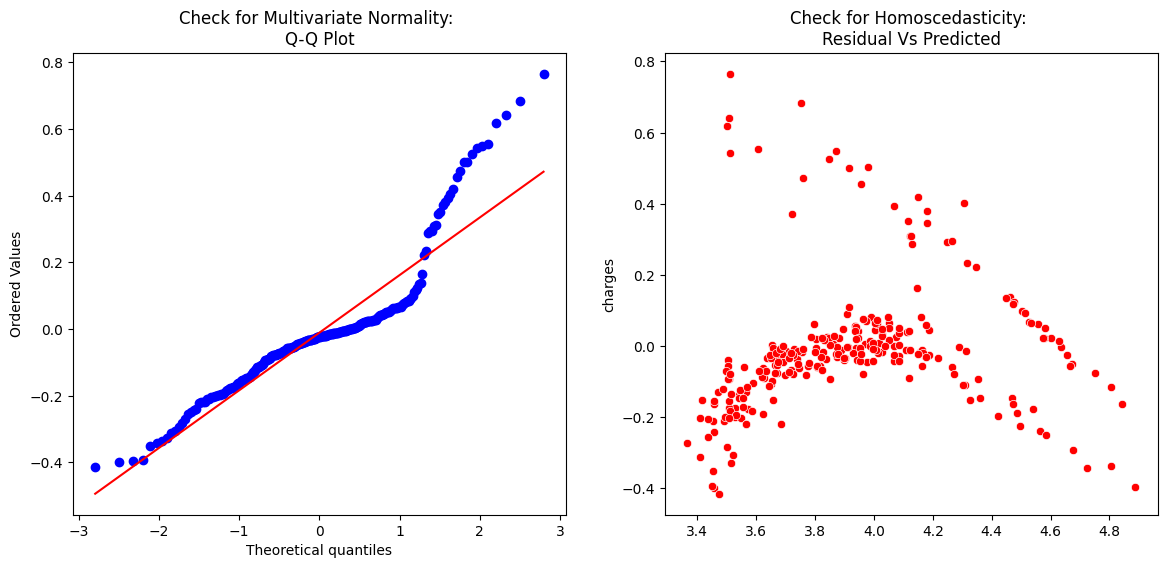

In [22]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

As a result of log scaling, the data became easier to model linearly, which resulted in better linear regression performance. The model is still not homoscedastic however and the model still tends to underestimate higher charges.